# Single-Cell Data Preprocessing
Phabel Antonio López Delgado

Human Brain Cortex Single-Cell Dataset: <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162170>
Main Paper: Trevino AE, Müller F, Andersen J, Sundaram L et al. Chromatin and gene-regulatory dynamics of the developing human cerebral cortex at single-cell resolution. Cell 2021 Sep 16;184(19):5053-5069.e23. PMID: 34390642

## Introduction

The data to be analysed is single-cell transcriptional data, which will be further used to implement a classification algortihm with deep learning. This dataset is FAIR and publicly available at NCBI - GEO Database: <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162170>. This data is obtained from biosensors: RNA sequencers, is structured, and has a specific protocol for its preprocessing. This last one includes: filtering, normalization, and scaling. Vizualization can be achived through the UMAP algorithm. Further analysis, like the Trajectory Inference analysis required for the project, can also be carried out. The main raw data is stored as .tsv files, and metadat as .txt files.

### Package Installation

Install all required packages and dependencias, including Scanpy.

In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install GEOparse

In [ ]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.3 MB/s eta 0:00:00


In [ ]:
!pip3 install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install fa2-modified

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fa2-modified: filename=fa2_modified-0.3.10-cp311-cp311-linux_x86_64.whl size=464863 sha256=41585840a5cd5050fe7b1906f79d69bf84df9b7f90f7ee7eedcd2902e2e306a6
  Stored in directory: /root/.cache/pip/wheels/81/b2/15/8a423eede3a6c1c71ef380530715a08c0c87f4a51659adae18
Successfully built fa2-modified


# Data Preprocessing

The preprocessing of single-cell data is a well-defined pipeline with best practices described in <https://www.sc-best-practices.org/preamble.html#>. This protocol follows those practices and uses the recommended specialized software: Scanpy.

### 1) Load Data

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter

# GEOparse
import GEOparse as geo

# ScanPy
import scanpy as sc

In [ ]:
sns.set_theme()
random.seed(1)

Explore the original dataset using GEOparser, check files, metadata, general information and decide which files are required. Use the GEO ID: GSE162170.

In [ ]:
# GEOparse object and charge database query
gse = geo.get_GEO(geo="GSE162170", destdir="GEO/") #GSE162170

16-May-2025 18:30:38 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/soft/GSE162170_family.soft.gz to GEO/GSE162170_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/soft/GSE162170_family.soft.gz to GEO/GSE162170_family.soft.gz
100%|██████████| 3.53k/3.53k [00:00<00:00, 23.8kB/s]
16-May-2025 18:30:39 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
16-May-2025 18:30:39 DEBUG downloader - Moving /tmp/tmpapyj6d0k to /content/GEO/GSE162170_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpapyj6d0k to /content/GEO/GSE162170_family.soft.gz
16-May-2025 18:30:39 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/soft/GSE162170_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/soft/GSE162170_family.soft.gz
16-May-2025 18:30:39 INFO GEOparse - Parsing GEO/GSE162170_family.s

In [ ]:
# Check available GEOdata
print("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print ("Table data:",)
    print (gsm.table.head())
    break
print("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print("Name: ", gpl_name)
    print("Metadata:",)
    for key, value in gpl.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print("Table data:",)
    print(gpl.table.head())
    break

GSM example:
Name:  GSM4944143
Metadata:
 - title : rna_hft_w16_p7_r1
 - geo_accession : GSM4944143
 - status : Public on Mar 31 2021
 - submission_date : Nov 25 2020
 - last_update_date : Sep 17 2021
 - type : SRA
 - channel_count : 1
 - source_name_ch1 : Cerebral cortex
 - organism_ch1 : Homo sapiens
 - taxid_ch1 : 9606
 - characteristics_ch1 : tissue_id: hft_w16_p7, age: pcw16, extraction: dissociation, whole cell
 - molecule_ch1 : total RNA
 - extract_protocol_ch1 : Samples were dissociated in papain and resuspended in ice-cold PBS + 0.02% BSA. For ATAC-seq, resuspension buffer (RSB) and lysis buffer (ALB) were prepared ice-cold. RSB: 10 mM Tris pH 7.4, 10 mM NaCl, 3 mM MgCl2. ALB: RSB + 0.1 % Tween-20 + 0.1% NP-40. Dissociated cells were counted and 100,000 cells were incubated for 5 minutes on ice in 100 uL ALB. ALB was diluted by adding 900 uL RSB, then samples were centrifuged at 500 x g for 5 minutes at 0 C. Nuclei were resuspended in 1X Nuclei Dilution Buffer (10X), checked f

Note that three files are required:


*   *GSE162170_multiome_rna_counts.tsv* ->  raw dataset
*   *GSE162170_multiome_cell_metadata.txt* -> metadata
*   *GSE162170_multiome_cluster_names.txt* -> labels



In [ ]:
# Supplementary Data & Metadata
files = gse.metadata["supplementary_file"]
files = [x for x in files if "multiome" in x]
files

['ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_atac_consensus_peaks.txt.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_atac_counts.tsv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_atac_gene_activities.tsv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_cell_metadata.txt.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_cluster_names.txt.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_rna_counts.tsv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_rna_logcounts.tsv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_spliced_rna_counts.tsv.gz',
 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE162nnn/GSE162170/suppl/GSE162170_multiome_unspliced_rna_counts.tsv.gz']

Download and access first file

In [ ]:
# Read Data
data_rna = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/GSE162170_multiome_rna_counts.tsv", sep='\t')
data_rna.T

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000239906,ENSG00000241860,ENSG00000241599,ENSG00000236601,ENSG00000284733,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,0,0,0,0,0,0,0,0,0,0,...,1,0,8,7,3,0,2,1,0,3
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,0,0,0,0,0,0,0,0,0,0,...,10,1,14,34,12,1,4,1,0,13
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,0,0,0,0,0,0,0,0,0,0,...,5,1,6,3,1,0,1,1,0,1
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,0,0,0,0,0,0,0,0,0,0,...,2,0,11,2,1,0,5,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,0,0,0,0,0,0,0,0,0,0,...,2,0,5,5,0,0,4,3,0,2
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,0,0,0,0,0,0,0,0,0,0,...,6,3,12,8,14,1,4,5,0,5
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,0,0,0,0,0,0,0,0,0,0,...,2,0,1,4,1,0,0,0,0,1
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,0,0,0,0,0,0,0,0,0,0,...,30,2,30,36,37,4,21,2,1,20


Check biological features: genes' IDs

In [ ]:
# Create AnnData object
adata_rna = sc.AnnData(data_rna.T)
# Check Genes as Vars
print(adata_rna)
adata_rna.var

AnnData object with n_obs × n_vars = 8981 × 34104


""
ENSG00000243485
ENSG00000237613
ENSG00000186092
ENSG00000238009
ENSG00000239945
...
ENSG00000212907
ENSG00000198886
ENSG00000198786
ENSG00000198695


Load second file: the cell metadata

In [ ]:
# Read MetaData
metadata = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/GSE162170_multiome_cell_metadata.txt", sep='\t', index_col=0)
metadata

,Sample.ID,Sample.Age,Sample.Batch,Cell.Barcode,RNA.Counts,RNA.Features,Dissociation.ID,percentMT,percentRibo,CR_Estimated.number.of.cells,...,DF_classification,DF_pANN_quantile,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,nCount_ambiguous,nFeature_ambiguous,RNA_snn_res.0.5,seurat_clusters
Cell.ID,,,,,,,,,,,,,,,,,,,,,
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCAATAA,2494,1435,A,0.000796,0.017516,3534,...,Singlet,0.728919,456,383,1374,791,111,89,10,c10
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACAGCCAGCTCATA,2257,1288,A,0.012798,0.033098,3534,...,Singlet,0.601585,477,369,1163,692,118,89,2,c2
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCACGTTACA,3485,1632,A,0.031098,0.039372,3534,...,Singlet,0.378325,736,526,1807,902,181,124,0,c0
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATAAACCT,2266,1247,A,0.012319,0.021557,3534,...,Singlet,0.378325,430,331,1230,686,106,80,4,c4
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,hft_ctx_w21_dc1r3_r1,pcw21,b2020_11,AAACATGCATTTAAGC,2741,1495,A,0.012341,0.020690,3534,...,Singlet,0.568761,525,414,1526,851,129,111,4,c4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGGTGCATGAATAG,4538,1910,B,0.006583,0.010753,2764,...,Singlet,0.671129,722,539,2684,1134,242,174,4,c4
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCCCAGTTTACG,5925,2155,B,0.012747,0.012244,2764,...,Singlet,0.603111,715,547,3890,1400,274,188,4,c4
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,hft_ctx_w21_dc2r2_r2,pcw21,b2020_11,TTTGTCTAGTGAGCAA,3496,1631,B,0.003410,0.025291,2764,...,Singlet,0.639291,546,417,2145,1020,180,127,2,c2


In [ ]:
# Add Clusters to adata.obs
adata_rna.obs['seurat_clusters'] = metadata['seurat_clusters'].tolist()
print(adata_rna)
adata_rna.obs['seurat_clusters']

AnnData object with n_obs × n_vars = 8981 × 34104
    obs: 'seurat_clusters'


,seurat_clusters
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,c10
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,c2
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,c0
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,c4
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,c4
...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,c4
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,c4
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,c2
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,c0


Read the third file: cell clusters labels

In [ ]:
# Read CellType-Cluster association info
celltypes_metadata = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/GSE162170_multiome_cluster_names.txt", sep='\t')
# Only RNA part
celltypes_metadata = celltypes_metadata[celltypes_metadata['Assay'] == "Multiome RNA"]
celltypes_metadata

,Assay,Cluster.ID,Cluster.Name
0,Multiome RNA,c0,nIPC/GluN1
1,Multiome RNA,c1,GluN2
2,Multiome RNA,c2,IN1
3,Multiome RNA,c3,GluN3
4,Multiome RNA,c4,IN2
5,Multiome RNA,c5,RG
6,Multiome RNA,c6,GluN4
7,Multiome RNA,c7,Cyc. Prog.
8,Multiome RNA,c8,mGPC/OPC
9,Multiome RNA,c9,IN3


Check original data.

In [ ]:
# Get CellTypes List
indexes = list()
for cluster in adata_rna.obs['seurat_clusters']:
    t = celltypes_metadata["Cluster.ID"] == cluster
    indexes.extend([i for i, x in enumerate(t) if x])

celltypes = [celltypes_metadata['Cluster.Name'][index] for index in indexes]

# Add CellTypes to adata object
adata_rna.obs['CellType'] = celltypes
print(adata_rna)
adata_rna.obs

AnnData object with n_obs × n_vars = 8981 × 34104
    obs: 'seurat_clusters', 'CellType'


,seurat_clusters,CellType
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,c10,GluN5
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,c2,IN1
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,c0,nIPC/GluN1
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,c4,IN2
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,c4,IN2
...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,c4,IN2
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,c4,IN2
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,c2,IN1
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,c0,nIPC/GluN1


### 2) Preprocessing

Check original raw data. Use Scanpy's specialized functions for quality control. There seems to be high-quality cells since there is no mitochondrial DNA, but normalization and scaling must be done.

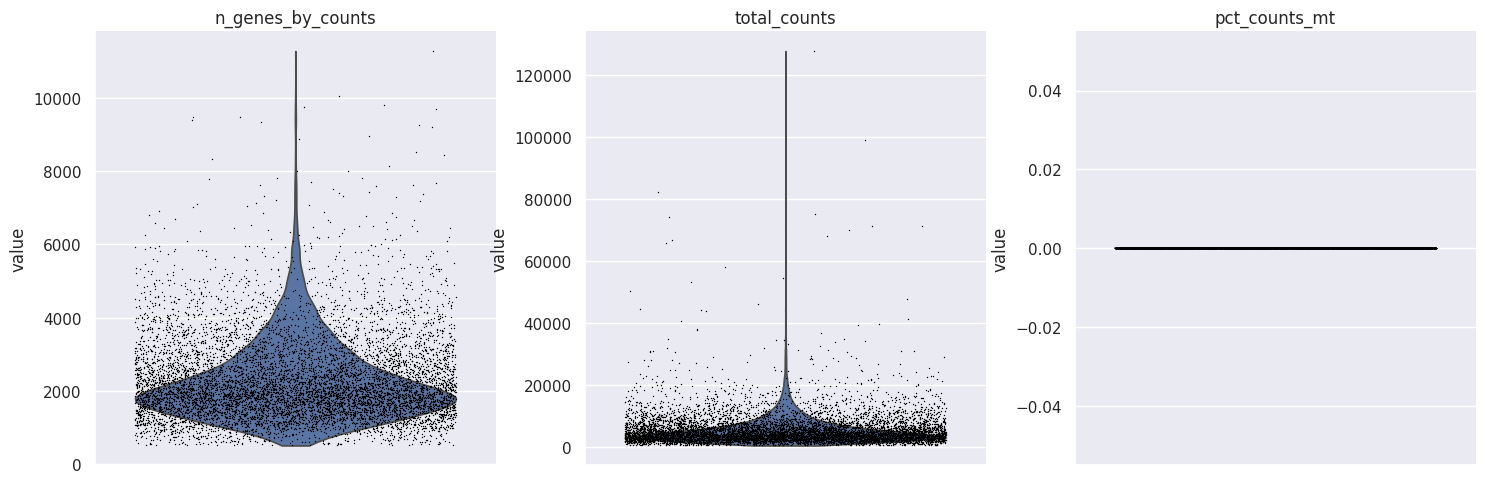

In [ ]:
# Quality Preprocessing

# Raw data
adata_rna.var['mt'] = adata_rna.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

Follow the standard preprocessing protocol: filtering of high-quality cells, normalization, logarithmization, and scaling.

In [ ]:
# Filtering
sc.pp.filter_genes(adata_rna, min_cells=3)
adata_rna = adata_rna[adata_rna.obs.n_genes_by_counts < 5000, :]

# Normalization
sc.pp.normalize_total(adata_rna, target_sum=1e4)

# Logarithmization
sc.pp.log1p(adata_rna)

# Scaling
sc.pp.scale(adata_rna, max_value=10)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adata_rna

AnnData object with n_obs × n_vars = 8739 × 26572
    obs: 'seurat_clusters', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'log1p'

# Results

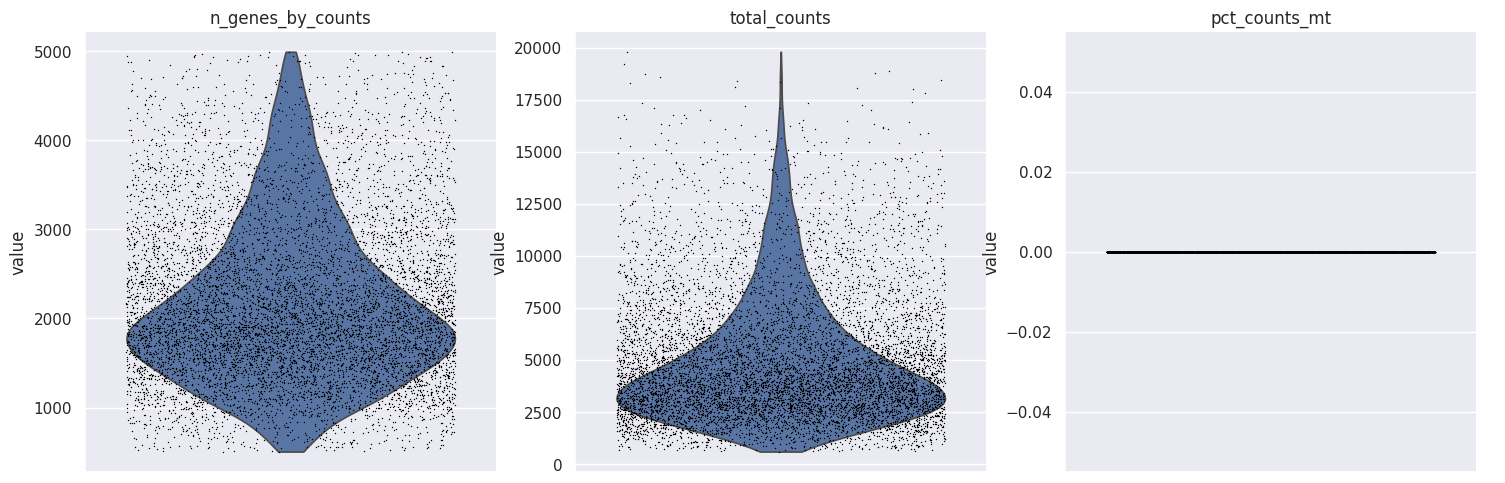

In [ ]:
# QC metrics
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

Check highly-variable feaures.

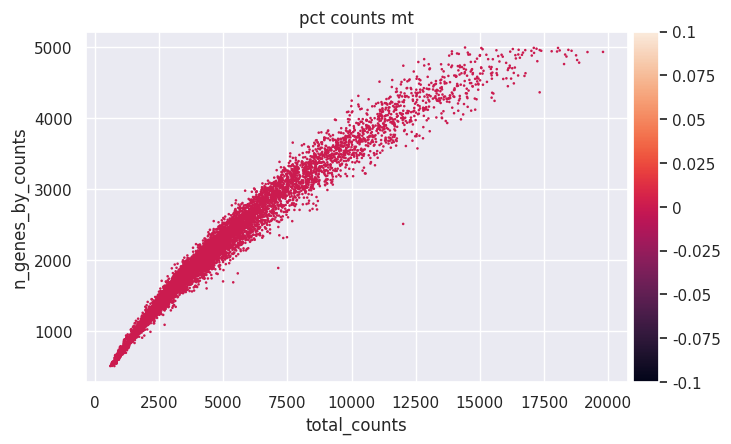

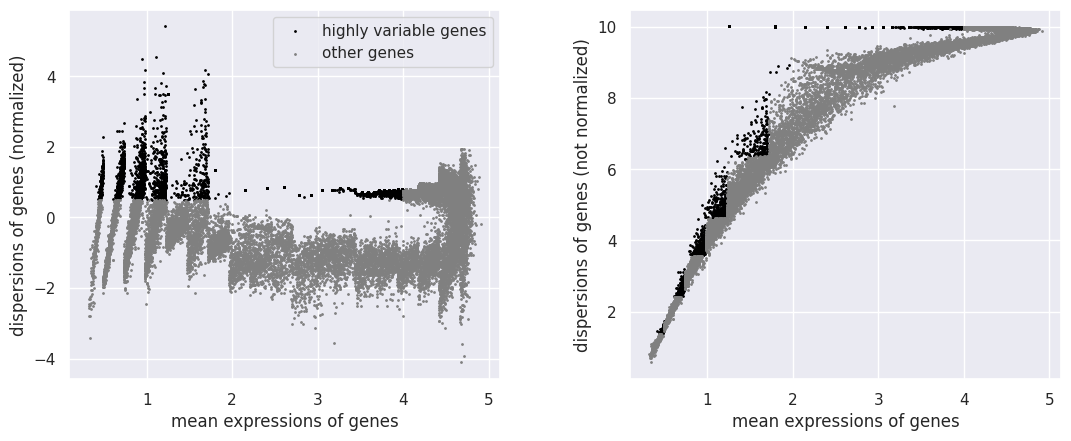

In [ ]:
# QC metrics jointly by inspecting a scatter plot
sc.pl.scatter(adata_rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

# HVG
sc.pp.highly_variable_genes(adata_rna, min_mean=0.02, max_mean=4, min_disp=0.5)
sc.pl.highly_variable_genes(adata_rna)

Linear dimensionality reduction with Principal Component Analysis.

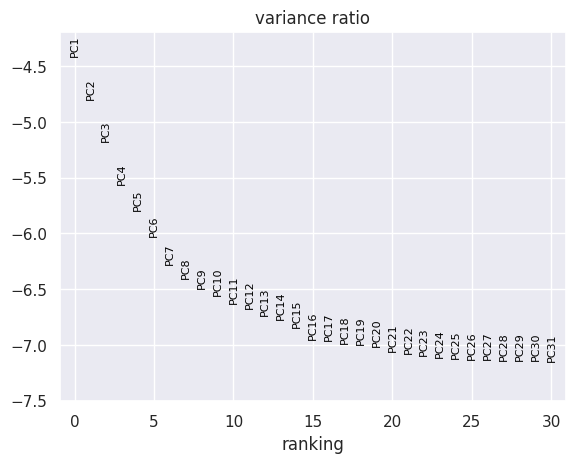

In [ ]:
# PCA
sc.tl.pca(adata_rna)
sc.pl.pca_variance_ratio(adata_rna, log=True)

### 3) Clustering

Cluster cells by cell type. First create a KNN graph with the preprocessed data from the PCA.

In [ ]:
# Neighbors
sc.pp.neighbors(adata_rna)

Cluster with the Leiden clustering algorithm for community detection.

In [ ]:
# Clustering
sc.tl.leiden(adata_rna, resolution=.5)

<ipython-input-24-75a8400007ca>:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_rna, resolution=.5)


In [ ]:
print(adata_rna)
adata_rna.obs

AnnData object with n_obs × n_vars = 8739 × 26572
    obs: 'seurat_clusters', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


,seurat_clusters,CellType,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,c10,GluN5,1435,2494,0,0.0,4
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,c2,IN1,1288,2257,0,0.0,2
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,c0,nIPC/GluN1,1632,3485,0,0.0,1
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,c4,IN2,1247,2266,0,0.0,2
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,c4,IN2,1495,2741,0,0.0,2
...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,c4,IN2,1910,4538,0,0.0,2
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,c4,IN2,2155,5925,0,0.0,2
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,c2,IN1,1631,3496,0,0.0,2
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,c0,nIPC/GluN1,1935,4099,0,0.0,1


Assign labels.

In [ ]:
# Update CellTypes (pandas.core.series.Series) - Remember ATAC and RNA do NOT have exactly the same labels. Use RNA labels to rely on phenotype
mapper_CellType = {'Cyc. Prog.': 'Cycling_Prog', 'mGPC/OPC': 'MultipotentGlialProgCells_OligodendrocyteProgCells', 'RG':'RadialGlia_Astrocytes', 'nIPC/GluN1':'IntermediateProgCells_NewbornExcitatoryNeurons', 'CluN3': 'Maturing_Neurons', 'GluN3':'Maturing_Neurons', 'GluN2':'UpperLayer_Neurons', 'GluN4':'DeepLayer_Neurons', 'GluN5':'DeepLayer_Neurons', 'SP': 'Subplate', 'IN1': 'Interneuron_1', 'IN2': 'Interneuron_2', 'IN3': 'Interneuron_3', 'IN4': 'Interneuron_4', 'GluN1': 'Glutamatergic_Neuron_1', 'GluN6': 'Glutamatergic_Neuron_6', 'EC/Peric.': 'EndothelialCell_Pericytes'}
adata_rna.obs.CellType = adata_rna.obs.CellType.replace(mapper_CellType)

<ipython-input-26-f46436a2326e>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_rna.obs.CellType = adata_rna.obs.CellType.replace(mapper_CellType)


In [ ]:
# Check new cell types
adata_rna.obs.CellType.cat.categories

Index(['Cycling_Prog', 'EndothelialCell_Pericytes', 'UpperLayer_Neurons',
       'Maturing_Neurons', 'DeepLayer_Neurons', 'Interneuron_1',
       'Interneuron_2', 'Interneuron_3', 'RadialGlia_Astrocytes', 'Subplate',
       'MultipotentGlialProgCells_OligodendrocyteProgCells',
       'IntermediateProgCells_NewbornExcitatoryNeurons'],
      dtype='object')

Visualize through Uniform Manifold Approximation and Projection algorithm (UMAP) by cell type.

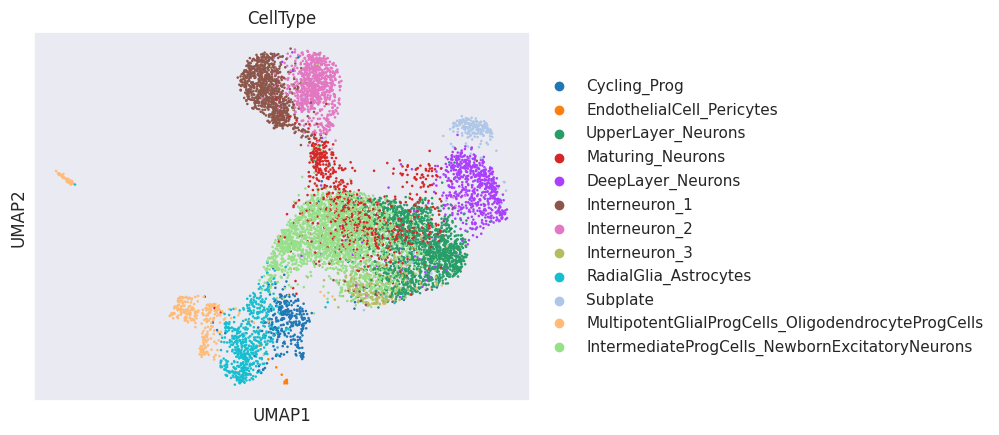

In [ ]:
# Neighbors
sc.pp.neighbors(adata_rna)
sc.tl.umap(adata_rna)
sc.pl.umap(adata_rna, color="CellType")

### 4) Trajectory Inference

Get the Trajectory Inference resuls of the data, which will also be required for future analysis. Each cell is assigned a score, called Diffusion Pseudotime (DPT) ranging [0, 1]. The closer to 0, the cell is less differentiated; the closer to 1, the cell is more differentiated.

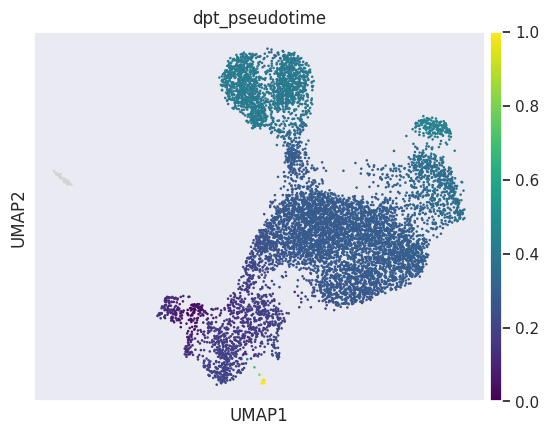

In [ ]:
# Root Cell
adata_rna.uns['iroot'] = np.flatnonzero(adata_rna.obs['CellType'] == 'MultipotentGlialProgCells_OligodendrocyteProgCells')[100]

# Diffusion Pseudotimes
sc.tl.diffmap(adata_rna)
sc.pp.neighbors(adata_rna, use_rep="X_diffmap")
sc.tl.dpt(adata_rna)
sc.pl.umap(adata_rna, color="dpt_pseudotime", color_map="viridis",)

Visualize the trajectories along with the Partition-based graph abstraction (PAGA) algorithm for a coarse-grain visualization of the labels.

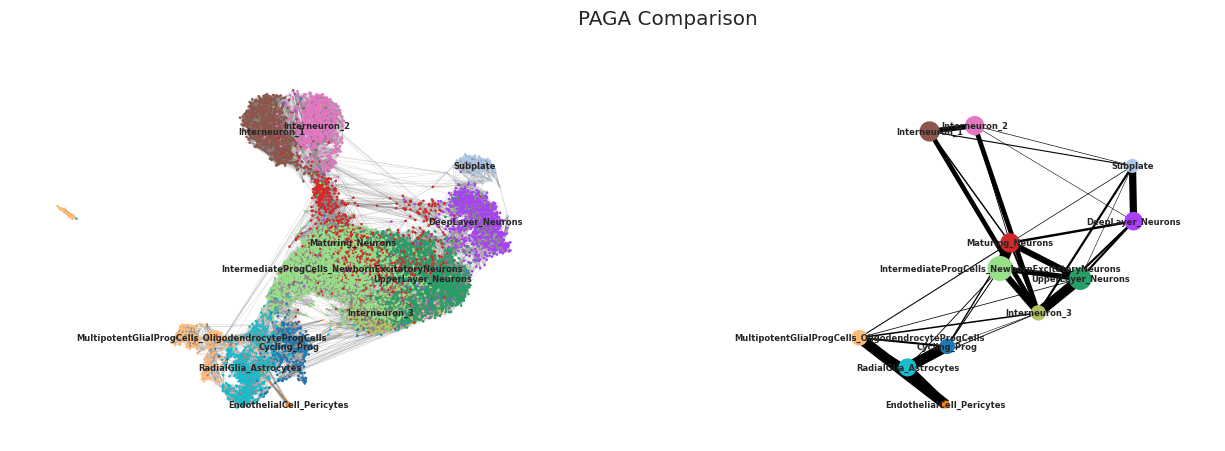

In [ ]:
sc.tl.paga(adata_rna, groups='CellType')
axs = sc.pl.paga_compare(
    adata_rna,
    title=f'PAGA Comparison',
    right_margin=0.2,
    threshold=0.05,
    legend_fontsize=6,
    fontsize=10,
    frameon=False,
    edges=True,
    show=False,
    save=False)
plt.sca(axs[0])
plt.xlabel('')
plt.ylabel('')
axs[0].set_frame_on(False)
plt.show()

Save data in .h5ad format

In [ ]:
# Save the AnnData object to an .h5ad file
adata_rna.write_h5ad("Preprocessed_HumanBrainCortex_RNA.h5ad")

Save matrix data in csv file

In [ ]:
# Turn into DataFrame
final_df = pd.DataFrame(adata_rna.X, index=adata_rna.obs_names, columns=adata_rna.var_names)
final_df

,ENSG00000238009,ENSG00000241860,ENSG00000229905,ENSG00000237491,ENSG00000177757,ENSG00000228794,ENSG00000225880,ENSG00000230368,ENSG00000272438,ENSG00000230699,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-1.433671,-1.083132,-3.107836,-3.130121,-2.450511,-0.947021,-2.689357,-1.490645,-0.471921,-1.131611
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-1.362200,-1.083132,0.164900,-0.107346,-0.131286,-0.947021,-0.538102,0.209455,-0.471921,-0.172242
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,0.148671,0.493635,0.276148,0.873533,0.660682,0.759609,-0.316650,-0.130893,-0.471921,0.730449
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-0.076207,0.884519,-0.092138,-0.813895,-0.977884,-0.947021,-1.101906,0.206193,-0.471921,-1.061002
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-0.985093,-1.083132,0.275315,-1.284667,-1.110450,-0.947021,0.090553,-1.490645,-0.471921,0.512530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-1.366045,-1.083132,-0.844823,-0.961787,-2.450511,-0.947021,-0.542580,0.548571,-0.471921,-1.061989
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-0.724413,1.016686,-0.325951,-0.797940,0.343262,0.299807,-0.764440,0.764851,-0.471921,-0.552017
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA,-0.062096,-0.082303,-0.019656,-0.242319,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,-1.172671,-1.083132,-1.878426,-0.931580,-1.272652,-0.947021,-2.689357,-1.490645,-0.471921,-1.370449
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG,-0.062096,-0.082303,-0.019656,3.975096,-0.021869,-0.279727,-0.094042,-0.063998,-0.126041,-0.081304,...,0.962603,0.980771,0.811835,0.782596,1.485448,2.048887,1.028914,0.289198,2.114167,0.970344


In [ ]:
# Save as CSV -> Too big to save it is better to save as .h5ad file
final_df.to_csv('ProcessedSingleCellHumanBrain_RNA.csv')

# Conclusion

The preprocessing was carried out successfully following oficial and standarized guidelines and using specialized libraries. The data was loaded, explored, visualized, filtered, normalized, logarithmized, and scaled. Futheremore, the data was reduced through dimensionality reduction, and it was clustered. All visualizations showed clean, well defined clusters associated to cell types, proving the process was correct. The final trajectory inference analysis was carried out successfully as well, showing realistic biological behaviour and rendering the final data required for the next steps of the project.

# Sources



*   Human Brain Cortex Single-Cell Dataset: <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162170>
*   Scanpy Protocols: <https://scanpy.readthedocs.io/en/stable/>
*   Scanpy Tutorials: <https://scanpy.readthedocs.io/en/stable/tutorials/index.html>
*   Single-Cell data best practices: <https://www.sc-best-practices.org/preamble.html>
*   Main Paper: Trevino AE, Müller F, Andersen J, Sundaram L et al. Chromatin and gene-regulatory dynamics of the developing human cerebral cortex at single-cell resolution. Cell 2021 Sep 16;184(19):5053-5069.e23. PMID: 34390642
